# Generate correction profiles for denoised

by Pu Zheng

2019.06.18

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

39964


In [2]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [3]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections_3color')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

# Illumination_correction

In [4]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = get_img_info.get_folders(master_folder, 'H')
#folders = [_fd for _fd in folders if 'Cy' in _fd or 'H0R0' in _fd]
folders.reverse()
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 4
- Number of field of views: 65
['\\\\10.245.74.158\\Chromatin_NAS_0\\20191005_colorswap_bleedthrough_corr\\flicking\\H4R0', '\\\\10.245.74.158\\Chromatin_NAS_0\\20191005_colorswap_bleedthrough_corr\\flicking\\H3R3_flicking', '\\\\10.245.74.158\\Chromatin_NAS_0\\20191005_colorswap_bleedthrough_corr\\flicking\\H2R2_flicking', '\\\\10.245.74.158\\Chromatin_NAS_0\\20191005_colorswap_bleedthrough_corr\\flicking\\H1R1_flicking']


In [7]:
# shared parameters
single_im_size = np.array([30,2048,2048])
all_colors = ['750','647','561','488','405']
# image and threads
num_images = 48
num_threads = 24

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '561', '488', '405'] illumination profiles
-- 48 among 65 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H4R0
++ start multi-processing illumination profile calculateion with 16 threads for 48 images in 586.62s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\Corrections_3color\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\Corrections_3color\illumination_correction_647_2048x2048.npy
--- saving 561 profile into file: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\Corrections_3color\illumination_correction_561_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_0\20191005_colorsw

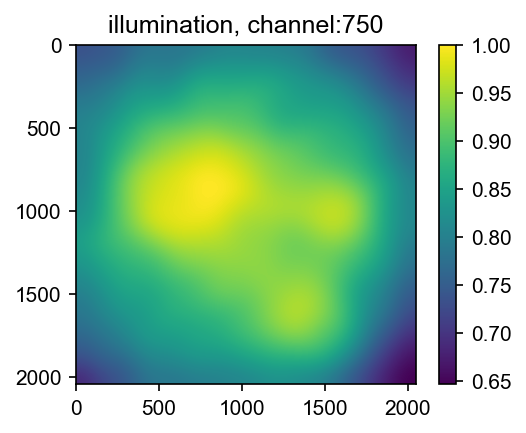

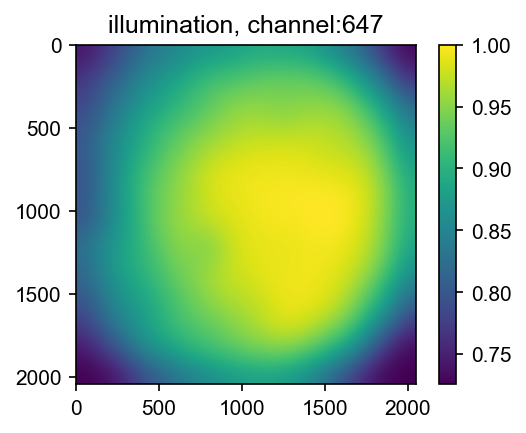

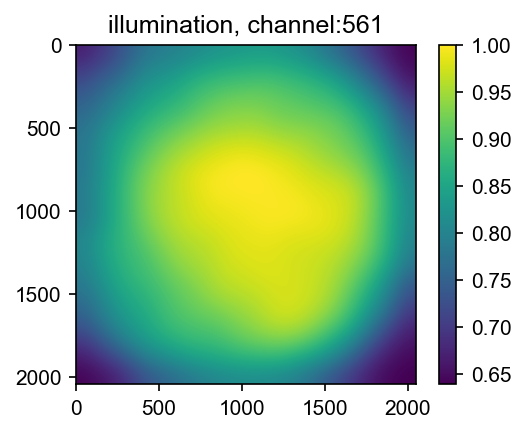

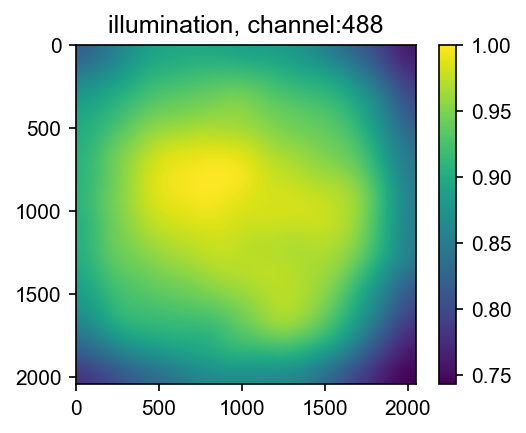

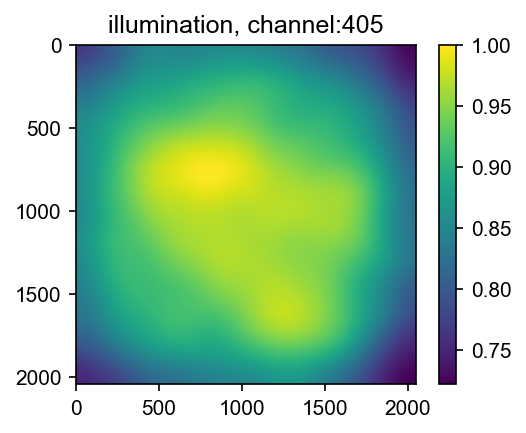

-- finish generating illumination profiles, time:616.44s


In [6]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        gaussian_filter_size=60,
                        save=True, save_folder=correction_folder,
                        overwrite=True,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [8]:
cc_folder = folders[1]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H3R3_flicking \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 48 images in 24 threads in 1229.013s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 2.89947070e-01  4.24390615e-03 -3.57043906e-06  2.57637321e-05] with rsquare=0.014794887145458513
-- constants: [-2.18718431e-01  7.24349499e-03 -1.79382615e-03 -5.16427164e-06] with rsquare=0.9191141704205352
-- constants: [-1.32882402e-01 -3.07449081e-03  6.54232782e-06 -1.77414933e-03] with rsquare=0.9051912660268286
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\Corrections_3color


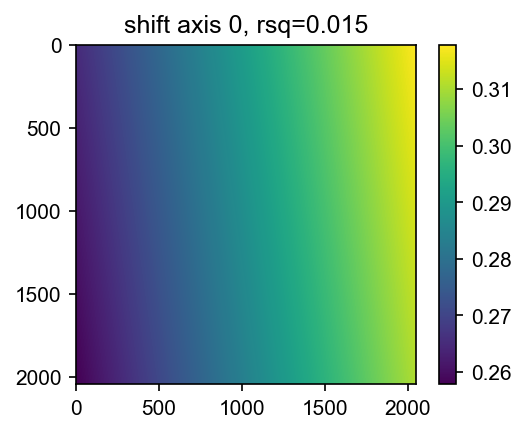

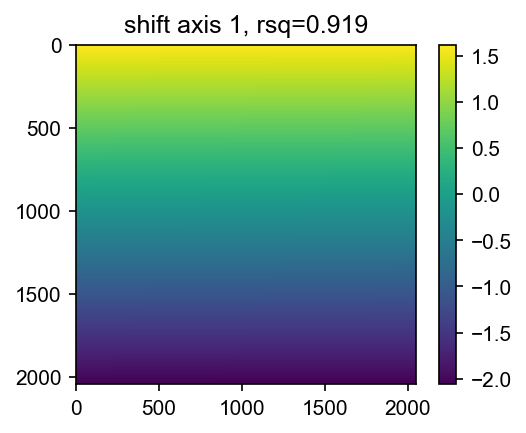

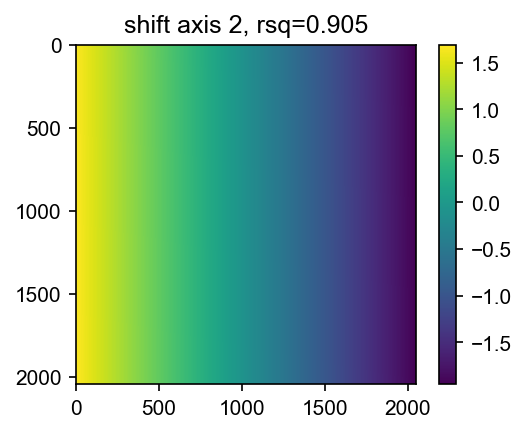

In [9]:
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    overwrite_temp=False, )

### check chromatic abbrevation, 750-647

In [10]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [750], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    corr_channels=['750', '647'],
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [750], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     corr_channels=['750', '647'],
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_05.dax  in 3.190s
-- removing hot pixels for channels:['647', '488'] in 20.096s
-- illumination correction for channels: 647, 488, in 3.889s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 28.414s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H3R3_flicking\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:


<IPython.core.display.Javascript object>


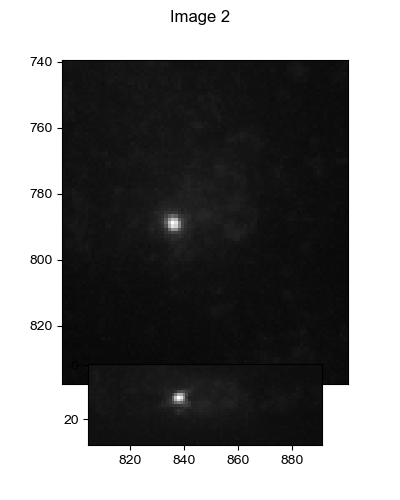

In [11]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [12]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([0.15, 0.36, 0.14]), _consts=[array([ 2.19153998e-01,  1.17212954e-02, -1.28482992e-06,  2.48282088e-05]), array([-2.02525547e-01,  4.42514593e-04, -1.74134400e-03, -1.75184194e-05]), array([-3.17643327e-01, -2.03395996e-04, -3.55423237e-05, -1.69978124e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  25., 1024., 1024.]))>

In [12]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '750', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 139 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1100.
  warnings.warn(errors[info][0], RuntimeWarning)


normalize total background:385.00, 139 fitted in 49.034s.
-- start fitting spots in channel:750, 142 seeded, normalize total background:385.00, 142 fitted in 48.929s.
-- start fitting spots in channel:647, 192 seeded, normalize total background:885.00, 192 fitted in 49.407s.


<IPython.core.display.Javascript object>


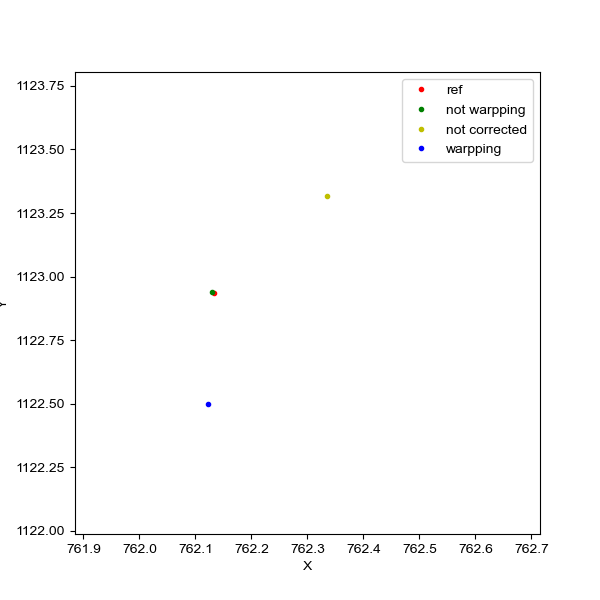

In [13]:
%matplotlib notebook
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not corrected')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

## chromatic for 561

In [14]:
cc_folder = folders[3]
ref_folder = folders[2]
print(cc_folder, ref_folder)

\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H1R1_flicking \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 48 images in 24 threads in 1383.865s.
++ fitting polynomial orders: [1 1 1]
-- constants: [-8.69471693e-01 -2.25381024e-02  3.94145851e-05 -1.03430218e-05] with rsquare=0.05205366465682759
-- constants: [ 2.25302605e-01  5.75440692e-03  1.41718568e-03 -1.32187199e-05] with rsquare=0.8307382470264416
-- constants: [ 9.83563062e-02  4.51374101e-03 -1.38081548e-05  1.37212954e-03] with rsquare=0.7361923193385072
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\Corrections_3color


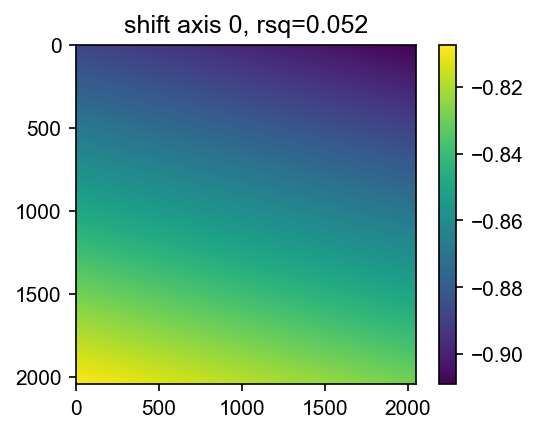

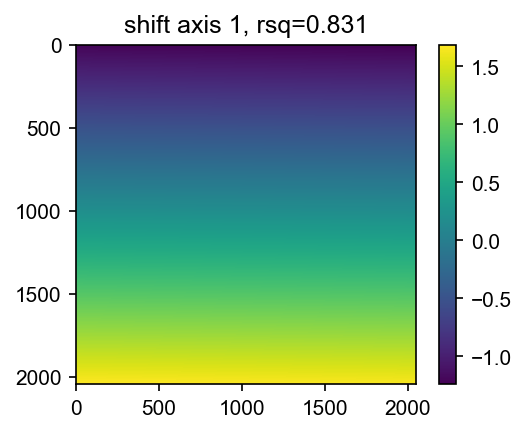

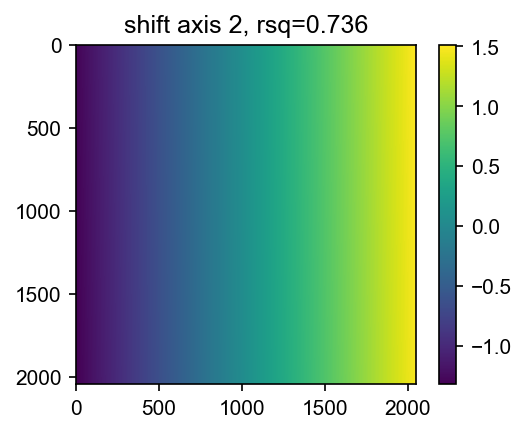

In [15]:
%matplotlib inline
reload(io_tools.load)
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '561',
                                    num_images=num_images, num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     },
                                    save_folder=correction_folder,
                                    overwrite_profile=True,
                                    #overwrite_temp=True,
                                    )

### check chromatic abbrevation, 561-647

In [16]:
test_fov_id = 5
ref_filename = os.path.join(ref_folder, fovs[test_fov_id])
cc_filename = os.path.join(cc_folder, fovs[test_fov_id])

# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
    [647, 488], 
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=True,
    illumination_corr=True,
    chromatic_corr=False,
    bleed_corr=False, 
    correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
    [561], 
    calculate_drift=True,
    ref_filename=ref_ims[-1],
    single_im_size=single_im_size,
    all_channels=all_colors,
    warp_image=False,
    illumination_corr=True,
    chromatic_corr=True,
    bleed_corr=False, 
    correction_folder=correction_folder,
    return_drift=True)

# target image, warppring
corr_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
     [561], 
     calculate_drift=False,
     drift=drift,
     ref_filename=ref_ims[-1],
     single_im_size=single_im_size,
     all_channels=all_colors,
     warp_image=True,
     illumination_corr=True,
     chromatic_corr=True, 
     bleed_corr=False, 
     correction_folder=correction_folder,
     return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_05.dax  in 4.056s
-- removing hot pixels for channels:['647', '488'] in 20.165s
-- illumination correction for channels: 647, 488, in 3.858s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 29.395s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H1R1_flicking\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:


<IPython.core.display.Javascript object>


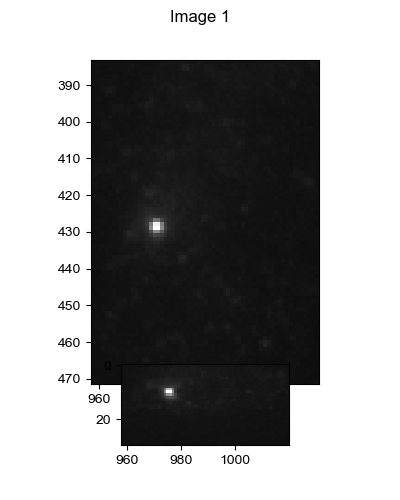

In [18]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([raw_ims[0], corr_ims[0], ref_ims[0]])

In [20]:
corr_funcs[0]

<function ImageAnalysis3.correction_tools.chromatic.generate_chromatic_function.<locals>._shift_function(_coords, _drift=array([-0.03,  0.22,  0.18]), _consts=[array([-6.06298712e-01, -8.63182521e-03,  2.15897162e-06, -8.62383157e-06]), array([ 1.54012437e-01, -1.65237821e-03,  1.53132346e-03, -2.49049753e-05]), array([ 5.84642835e-02, -1.22168790e-03,  2.79851173e-06,  1.51559632e-03])], _fitting_orders=array([1, 1, 1]), _ref_center=array([  25., 1024., 1024.]))>

In [19]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 1

corr_spots = fit_fov_image(corr_ims[0], '561', th_seed=400, normalize_backgroud=True)
raw_spots = fit_fov_image(raw_ims[0], '561', th_seed=400, normalize_backgroud=True)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=600, normalize_backgroud=True)
corr_spots = corr_spots[corr_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:561, 500 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.
E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:248: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1100.
  warnings.warn(errors[info][0], RuntimeWarning)


normalize total background:1235.00, 500 fitted in 64.966s.
-- start fitting spots in channel:561, 500 seeded, normalize total background:1245.00, 500 fitted in 63.619s.
-- start fitting spots in channel:647, 192 seeded, normalize total background:885.00, 192 fitted in 51.465s.


<IPython.core.display.Javascript object>


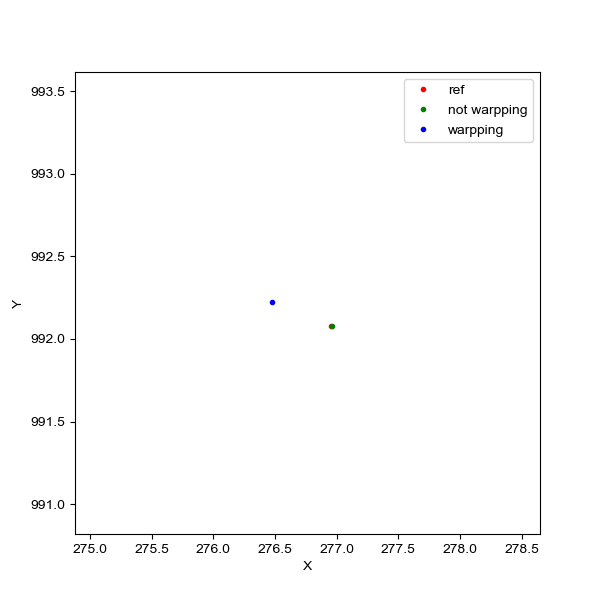

In [20]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(corr_spots[:,2], corr_spots[:,3], 'r.', label='ref')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='not warpping')
#plt.plot(raw_spots[:,2], raw_spots[:,3], 'y.', label='not warpping')

plt.plot(ref_spots[:,2], ref_spots[:,3], 'b.', label='warpping')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(ref_spots[:,2]+drift[1], ref_spots[:,3]+drift[2], 'b.')
plt.show()

# bleedthrough correction

In [21]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647', '561']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750', '647', '561'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
}

bleedthrough_fitting_args = {'max_num_seeds':200,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 48 images in 24 threads in 3.079s.
- check 442 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.930, total: 0.930 in 3.810s
-- iter: 2, kept in this round: 0.869, total: 0.808 in 3.318s
-- iter: 3, kept in this round: 0.910, total: 0.735 in 2.462s
-- iter: 4, kept in this round: 0.932, total: 0.686 in 2.025s
-- iter: 5, kept in this round: 0.937, total: 0.643 in 1.756s
-- iter: 6, kept in this round: 0.958, total: 0.615 in 1.540s
- 272 pairs passed.
-- 272 spots are used to generate profiles from 750 to 647
[ 1.46865981e-01 -2.91874272e-03  2.69122490e-05  1.58198445e-05
  1.14878957e-04  1.19485456e-07 -4.25370997e-07 -1.66201827e-08
  5.42014979e-09 -5.53937337e-09] 0.22296788419621894
[ 4.93311318e+02 -7.17106141e+00  2.03843823e-01  2.73060046e-01
  4.36358266e-01 -1.57705260e-03 -4.49779945e-03 -9.81941911e-05
  5.02287835e-06 -9.44363269e-05

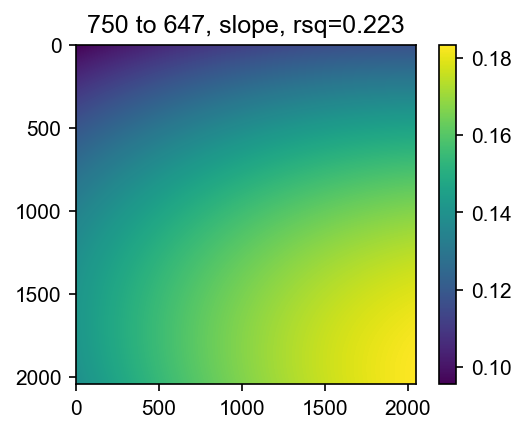

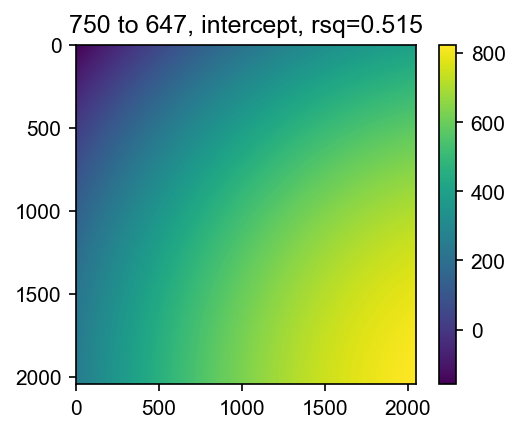

-- not enough spots (6) from 750 to 561
-- not enough spots (32) from 647 to 750
-- only keep the top 1000 spots from 1256 for bleedthrough interpolation.
- check 1000 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.915, total: 0.915 in 20.117s
-- iter: 2, kept in this round: 0.871, total: 0.797 in 17.052s
-- iter: 3, kept in this round: 0.915, total: 0.729 in 12.872s
-- iter: 4, kept in this round: 0.940, total: 0.685 in 10.697s
-- iter: 5, kept in this round: 0.968, total: 0.663 in 9.421s
- 663 pairs passed.
-- 663 spots are used to generate profiles from 647 to 561
[ 4.12931490e-01 -2.00129570e-03  1.26531140e-04  7.47735422e-05
  1.83645539e-04 -1.80255748e-06  1.10848358e-06 -4.92848007e-08
 -2.23688262e-08 -3.82139093e-08] 0.1090180722171572
[ 1.51854153e+02  3.51526448e+00 -8.79842297e-02 -1.91732781e-02
 -3.63162263e-01  2.33868419e-03 -1.50815573e-03  3.09194497e-05
  2.37167700e-05  1.12107187e-05] 0.040673

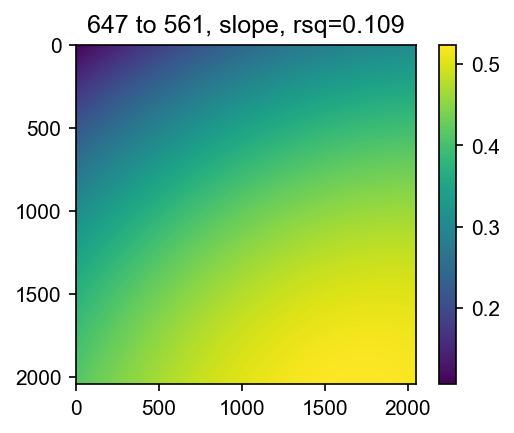

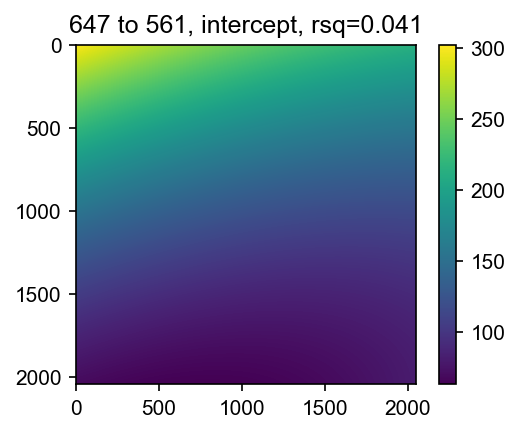

-- not enough spots (3) from 561 to 750
- check 168 bleedthrough pairs.
- start iteration with outlier_sigma=2.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.935, total: 0.935 in 0.583s
-- iter: 2, kept in this round: 0.790, total: 0.738 in 0.518s
-- iter: 3, kept in this round: 0.726, total: 0.536 in 0.320s
-- iter: 4, kept in this round: 0.856, total: 0.458 in 0.162s
-- iter: 5, kept in this round: 0.922, total: 0.423 in 0.121s
-- iter: 6, kept in this round: 0.944, total: 0.399 in 0.101s
-- iter: 7, kept in this round: 0.955, total: 0.381 in 0.088s
- 64 pairs passed.
-- not enough spots f(64) from 561 to 647
-- generating inverse matrix.
-- saving to file:\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\Corrections_3color\bleedthrough_correction_750_647_561_2048_2048.npy


In [27]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[1:4], rsq_th=0.81, 
            #interpolate_args={'check_params':{'keep_per_th':0.94}},
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_args=bleedthrough_fitting_args,
            num_images=num_images, num_threads=num_threads,
            save_folder=correction_folder,
            #fitting_order=1,
            overwrite_profile=True,
            overwrite_temp=False,
            )

### Check bleedthorugh for cy7

In [28]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [29]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[1], fovs[3])

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, bleed_profile=bleed_pf,
                                                   chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H3R3_flicking\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H3R3_flicking\Conv_zscan_03.dax  in 2.436s
-- removing hot pixels for channels:['750', '647', '561'] in 30.246s
-- illumination correction for channels: 750, 647, 561, in 5.781s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 40.021s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H3R3_flicking\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	

<IPython.core.display.Javascript object>


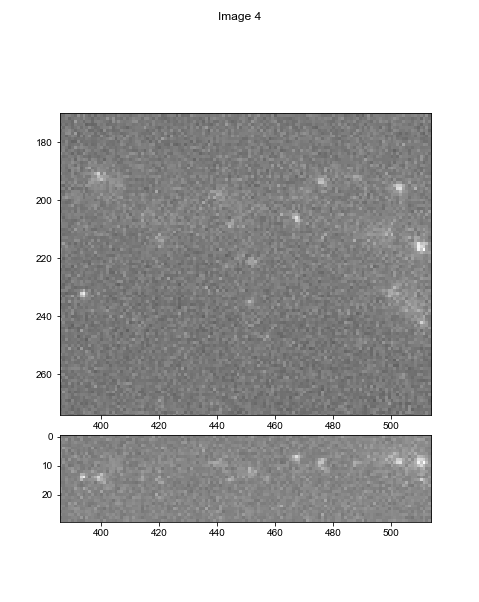

In [30]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

## Check bleedthrough for cy5

In [31]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[2], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_03.dax  in 3.361s
-- removing hot pixels for channels:['750', '647', '561'] in 30.359s
-- illumination correction for channels: 750, 647, 561, in 5.839s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 41.323s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H2R2_flicking\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	

<IPython.core.display.Javascript object>


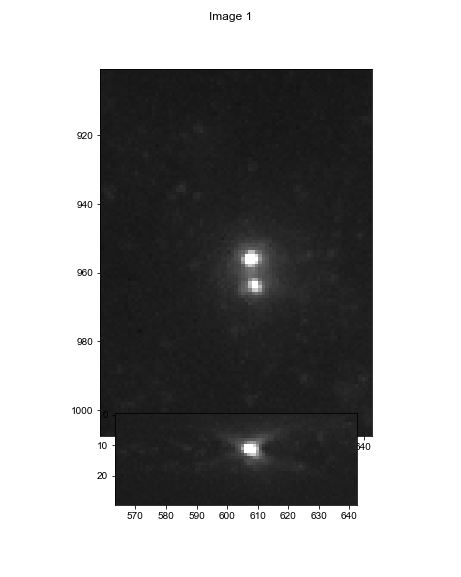

In [32]:
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[1], cy5_corr_ims[1], cy5_raw_ims[2], cy5_corr_ims[2]])

## Check bleedthrough for cy3

In [35]:
reload(ia.io_tools.load)
cy3_filename = os.path.join(folders[3], fovs[3])

cy3_raw_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy3_corr_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H1R1_flicking\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H1R1_flicking\Conv_zscan_03.dax  in 3.404s
-- removing hot pixels for channels:['750', '647', '561'] in 30.208s
-- illumination correction for channels: 750, 647, 561, in 5.767s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 40.931s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20191005_colorswap_bleedthrough_corr\flicking\H1R1_flicking\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	

<IPython.core.display.Javascript object>


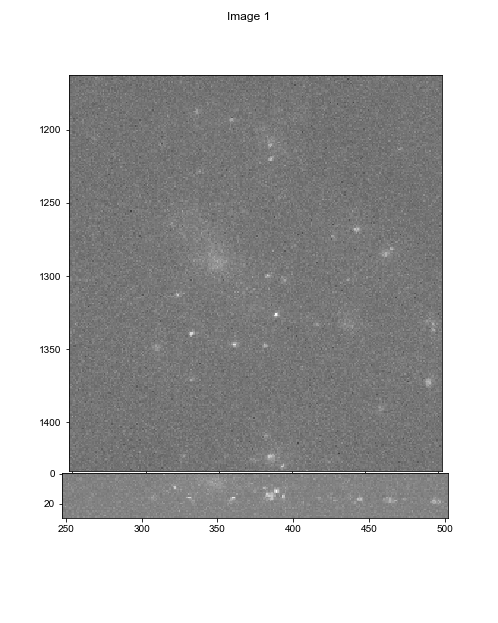

In [37]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy3_raw_ims[1], cy3_corr_ims[1], cy3_raw_ims[2], cy3_corr_ims[2]])